In [13]:
# !pip install pennylane
# !pip install matplotlib# !pip install scikit-learn

# From Classical to Quantum: A Beginner's Guide to QML

## Prerequisites for Quantum Machine Learning

This guide will help you transition from classical computing to quantum computing concepts, explaining the fundamentals needed for Quantum Machine Learning (QML).

## 1. From Classical Bits to Quantum Bits (Qubits)

### Classical Bits: What You Already Know

In classical computing, we use bits as the basic unit of information:
- A bit can be either 0 or 1
- It's like a light switch: either ON or OFF
- At any moment, a bit is in exactly one state

In [1]:
# Classical bit representation
classical_bit = 0  # Can only be 0 or 1

### Quantum Bits (Qubits): The Quantum Difference

A qubit is the quantum equivalent of a classical bit, but with fascinating differences:

- A qubit can be in state |0⟩, state |1⟩, or a **superposition** of both states simultaneously
- The notation |0⟩ and |1⟩ is called "ket" notation, coming from quantum mechanics
- Superposition means a qubit exists as a combination of multiple states at once

In [2]:
# In PennyLane, a qubit starts in state |0⟩ by default
# We can put it in superposition with a Hadamard gate
import pennylane as qml

dev = qml.device('default.qubit', wires=1)  # Create a device with 1 qubit

@qml.qnode(dev)
def superposition_demo():
    qml.Hadamard(wires=0)  # Put qubit in superposition
    return qml.state()  # Return the quantum state

result = superposition_demo()
print(result)  # Outputs: [0.7071+0.j 0.7071+0.j] (equal superposition of |0⟩ and |1⟩)

[0.70710678+0.j 0.70710678+0.j]


**Visual Analogy**: If a classical bit is like a coin showing either heads or tails, a qubit is like a spinning coin - simultaneously heads and tails until measured.

## 2. Understanding Quantum States

A quantum state represents all the information about a quantum system. For a single qubit:

- State |0⟩ is represented as [1, 0]
- State |1⟩ is represented as [0, 1]
- A superposition state is a combination, like [0.7071, 0.7071]

The numbers in these vectors are called **probability amplitudes**. When we measure a qubit:
- The probability of getting |0⟩ is the square of the first amplitude
- The probability of getting |1⟩ is the square of the second amplitude

In [4]:
# Creating and measuring a biased superposition state
@qml.qnode(dev)
def biased_superposition():
    # Create uneven superposition (more likely to measure |0⟩)
    qml.RY(0.6, wires=0)  # Rotation around Y-axis
    return qml.probs(wires=0)  # Return measurement probabilities

probabilities = biased_superposition()
print(probabilities)  # Approximately [0.75, 0.25]
                      # 75% chance of measuring |0⟩, 25% chance of |1⟩

[0.91266781 0.08733219]


## 3. Quantum Gates: The Building Blocks

Quantum gates are operations that manipulate qubits, similar to how logic gates manipulate classical bits.

### Basic Single-Qubit Gates

1. **X Gate** (NOT gate): Flips |0⟩ to |1⟩ and vice versa
   ```python
   qml.X(wires=0)  # Flip the qubit
   ```

2. **H Gate** (Hadamard): Creates equal superposition
   ```python
   qml.Hadamard(wires=0)  # Creates |+⟩ state: equal parts |0⟩ and |1⟩
   ```

3. **Rotation Gates**: Rotate the qubit state around the X, Y, or Z axis
   ```python
   qml.RX(0.5, wires=0)  # Rotate around X-axis by 0.5 radians
   qml.RY(0.3, wires=0)  # Rotate around Y-axis
   qml.RZ(1.2, wires=0)  # Rotate around Z-axis
   ```

### Visual Representation of Gates

These gates can be visualized using the Bloch sphere, where:
- |0⟩ is at the north pole
- |1⟩ is at the south pole
- Superposition states are points on the sphere's surface



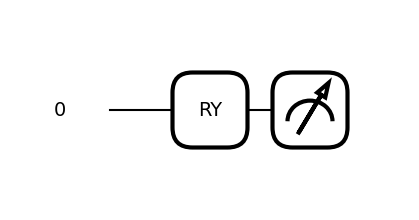

In [6]:
# Visualizing gates on the Bloch sphere
import matplotlib.pyplot as plt

@qml.qnode(dev)
def visualize_rotations():
    qml.RY(0.8, wires=0)
    return qml.state()

# With PennyLane's draw function
fig, ax = qml.draw_mpl(visualize_rotations)()
plt.show()  # This would show the circuit diagram

### Two-Qubit Gates for Entanglement

1. **CNOT Gate**: Controlled-NOT gate - flips the second qubit if the first is |1⟩
   ```python
   qml.CNOT(wires=[0, 1])  # Control qubit is 0, target qubit is 1
   ```

2. **CZ Gate**: Controlled-Z gate - applies Z operation on second qubit if first is |1⟩
   ```python
   qml.CZ(wires=[0, 1])
   ```

## 4. Quantum Entanglement: Spooky Action at a Distance

Entanglement is a unique quantum phenomenon where qubits become correlated in ways impossible in classical physics.

In [7]:
# Creating an entangled Bell state
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def bell_state():
    qml.Hadamard(wires=0)  # Put first qubit in superposition
    qml.CNOT(wires=[0, 1])  # Entangle the qubits
    return qml.state()

entangled_state = bell_state()
print(entangled_state)  # Approximately [0.7071, 0, 0, 0.7071]
                        # This represents |00⟩ + |11⟩

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


**In plain English**: When two qubits are entangled, measuring one immediately affects the other, regardless of distance. If you measure the first qubit as |0⟩, the second will definitely be |0⟩ too (in this Bell state).

## 5. Quantum Measurement: Collapsing the Wave Function

When we measure a qubit, its superposition collapses to either |0⟩ or |1⟩:

In [8]:
# Demonstrating measurement
dev = qml.device('default.qubit', wires=1, shots=1000)  # 1000 repetitions

@qml.qnode(dev)
def measure_demo():
    qml.Hadamard(wires=0)  # Equal superposition
    return qml.sample(qml.PauliZ(0))  # Measure in Z-basis

results = measure_demo()
zeros = (results + 1) / 2  # Convert from ±1 to 0/1
ones = (-results + 1) / 2
print(f"Measured |0⟩ approximately {sum(zeros)/len(zeros)*100}% of the time")
print(f"Measured |1⟩ approximately {sum(ones)/len(ones)*100}% of the time")

Measured |0⟩ approximately 48.6% of the time
Measured |1⟩ approximately 51.4% of the time


## 6. Quantum Circuits: Putting It All Together

A quantum circuit is a sequence of quantum gates applied to qubits:

In [9]:
# Simple quantum circuit
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def simple_circuit(x, y):
    # Data encoding
    qml.RX(x, wires=0)
    qml.RY(y, wires=1)
    
    # Processing
    qml.CNOT(wires=[0, 1])
    qml.RZ(0.5, wires=1)
    
    # Measurement
    return qml.expval(qml.PauliZ(1))  # Expectation value of Z measurement

result = simple_circuit(0.7, 1.2)
print(f"Circuit output: {result}")

Circuit output: 0.27714649751343456


## 7. From Classical ML to Quantum ML

### Classical ML Reminder
In classical ML, we typically:
1. Prepare data
2. Define a model with parameters
3. Train the model by optimizing parameters
4. Make predictions

### QML Approach
In QML, we follow a similar pattern:

1. **Prepare classical data**
2. **Encode data into quantum states**
3. **Process with parameterized quantum circuits**
4. **Measure to get classical results**
5. **Optimize circuit parameters**

In [10]:
# Basic QML workflow
import pennylane as qml
import numpy as np

# 1. Set up a quantum device
dev = qml.device("default.qubit", wires=2)

# 2. Define a quantum circuit with trainable parameters
@qml.qnode(dev)
def quantum_circuit(inputs, weights):
    # Encode data
    qml.RX(inputs[0], wires=0)
    qml.RY(inputs[1], wires=1)
    
    # Apply trainable rotation gates
    qml.RZ(weights[0], wires=0)
    qml.RY(weights[1], wires=1)
    
    # Entangle qubits
    qml.CNOT(wires=[0, 1])
    
    # Apply more trainable gates
    qml.RX(weights[2], wires=0)
    qml.RZ(weights[3], wires=1)
    
    # Measure the first qubit
    return qml.expval(qml.PauliZ(0))

# 3. Define a simple dataset
X = np.array([[0.1, 0.2], [0.8, 0.9], [0.4, 0.1], [0.7, 0.6]])
y = np.array([0, 1, 0, 1])

# 4. Define a cost function
def cost(weights, X, y):
    predictions = [quantum_circuit(x, weights) for x in X]
    # Convert predictions from [-1,1] to [0,1] range
    predictions = (np.array(predictions) + 1) / 2
    # Mean squared error
    return np.mean((predictions - y) ** 2)

# 5. Initialize random weights
init_weights = np.random.uniform(0, 2*np.pi, size=4)

# 6. Create an optimizer
opt = qml.GradientDescentOptimizer(stepsize=0.1)

# 7. Training loop
weights = init_weights
for i in range(50):
    weights = opt.step(lambda w: cost(w, X, y), weights)
    if i % 10 == 0:
        print(f"Cost at step {i}: {cost(weights, X, y):.4f}")

# 8. Make predictions
final_predictions = [(quantum_circuit(x, weights) + 1) / 2 for x in X]
print("Predictions:", np.round(final_predictions, 2))
print("Actual values:", y)

/home/sagemaker-user/.conda/envs/qml/lib/python3.10/site-packages/pennylane/_grad.py:216: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(


Cost at step 0: 0.3717
Cost at step 10: 0.3717
Cost at step 20: 0.3717
Cost at step 30: 0.3717
Cost at step 40: 0.3717
Predictions: [0.04 0.15 0.08 0.13]
Actual values: [0 1 0 1]


## 8. Common QML Gates and Their Purpose

Here's a quick reference of gates commonly used in QML:

| Gate | Symbol | Purpose in QML |
|------|--------|----------------|
| RX | RX(θ) | Encode continuous values; rotate around X-axis |
| RY | RY(θ) | Encode continuous values; rotate around Y-axis |
| RZ | RZ(θ) | Encode continuous values; rotate around Z-axis |
| Hadamard | H | Create superposition; useful for feature maps |
| CNOT | CNOT | Create entanglement between qubits |
| CZ | CZ | Create entanglement with phase change |
| SWAP | SWAP | Switch states of two qubits |
| U3 | U3(θ,φ,λ) | General single-qubit rotation (universal) |



## 9. Data Encoding: Getting Classical Data into Quantum Form

Three common encoding methods:

### Angle Encoding
Map classical values to rotation angles:

```python
def angle_encoding(x, wires):
    for i, feature in enumerate(x):
        qml.RY(feature, wires=i)
```

### Amplitude Encoding
Encode data in the probability amplitudes:

```python
def amplitude_encoding(x, wires):
    # Normalize the input vector
    x_normalized = x / np.linalg.norm(x)
    qml.AmplitudeEmbedding(x_normalized, wires=wires, normalize=True)
```

### Basis Encoding
Encode binary data directly in computational basis states:

```python
def basis_encoding(x, wires):
    for i, bit in enumerate(x):
        if bit == 1:
            qml.PauliX(wires=i)  # Flip the qubit if bit is 1
```

## 10. Your First QML Algorithm

Let's put everything together and implement a simple quantum classifier:

In [11]:
# Complete quantum classifier example
import pennylane as qml
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Prepare data (just 2 features for simplicity)
iris = load_iris()
X = iris.data[:, :2]  # Take first two features
y = iris.target
# Keep only 2 classes for binary classification
X = X[y != 2]
y = y[y != 2]

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale to [0, π] range for rotation gates
X_train_scaled = X_train * np.pi
X_test_scaled = X_test * np.pi

# Set up quantum device
dev = qml.device('default.qubit', wires=2)

# Define quantum circuit
@qml.qnode(dev)
def quantum_classifier(inputs, weights):
    # Encode the 2 features
    qml.RX(inputs[0], wires=0)
    qml.RY(inputs[1], wires=1)
    
    # First layer of trainable gates
    qml.RZ(weights[0], wires=0)
    qml.RY(weights[1], wires=1)
    
    # Entangling gates
    qml.CNOT(wires=[0, 1])
    
    # Second layer of trainable gates
    qml.RX(weights[2], wires=0)
    qml.RZ(weights[3], wires=1)
    
    # Return expectation value
    return qml.expval(qml.PauliZ(0))

# Define cost function
def cost(weights):
    predictions = [quantum_classifier(x, weights) for x in X_train_scaled]
    predictions = (np.array(predictions) + 1) / 2  # Map from [-1,1] to [0,1]
    return np.mean((predictions - y_train) ** 2)

# Initialize weights
np.random.seed(42)
weights = np.random.uniform(0, 2*np.pi, size=4)

# Create optimizer
opt = qml.GradientDescentOptimizer(stepsize=0.2)

# Training loop
print("Training quantum classifier...")
for i in range(100):
    weights = opt.step(cost, weights)
    if i % 20 == 0:
        cost_val = cost(weights)
        print(f"Cost at step {i}: {cost_val:.4f}")

# Evaluate on test set
predictions = [(quantum_classifier(x, weights) + 1) / 2 for x in X_test_scaled]
predictions_binary = np.round(predictions)
accuracy = np.mean(predictions_binary == y_test)
print(f"Test accuracy: {accuracy:.4f}")

# Visualize a few test predictions
for i in range(5):
    x = X_test_scaled[i]
    pred = (quantum_classifier(x, weights) + 1) / 2
    actual = y_test[i]
    print(f"Sample {i+1}: Predicted {pred:.2f} (Class {int(round(pred))}), Actual {actual}")

Training quantum classifier...


/home/sagemaker-user/.conda/envs/qml/lib/python3.10/site-packages/pennylane/_grad.py:216: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(


Cost at step 0: 0.2894
Cost at step 20: 0.2894
Cost at step 40: 0.2894
Cost at step 60: 0.2894
Cost at step 80: 0.2894
Test accuracy: 0.4333
Sample 1: Predicted 0.58 (Class 1), Actual 1
Sample 2: Predicted 0.41 (Class 0), Actual 1
Sample 3: Predicted 0.42 (Class 0), Actual 1
Sample 4: Predicted 0.60 (Class 1), Actual 0
Sample 5: Predicted 0.20 (Class 0), Actual 0


## 11. Key QML Algorithms

1. **Variational Quantum Eigensolver (VQE)**: Finds the lowest energy state
2. **Quantum Approximate Optimization Algorithm (QAOA)**: Solves combinatorial optimization problems
3. **Quantum Neural Networks (QNN)**: Quantum version of neural networks 
4. **Quantum Support Vector Machines (QSVM)**: Leverages quantum kernels for classification

## 12. QML Challenges

1. **Barren plateaus**: Gradients vanish in deep quantum circuits
2. **Limited qubits**: Current hardware limits available qubits
3. **Decoherence and noise**: Real quantum computers have errors
4. **Data loading**: Efficiently encoding classical data is challenging

## 13. Additional QML Tools and References

### Quantum Machine Learning Tools and References

#### Core Frameworks

| Framework | Creator | Focus | Link |
|-----------|---------|-------|------|
| **PennyLane** | Xanadu | ML integration, device-agnostic | [PennyLane](https://pennylane.ai/) |
| **Qiskit** | IBM | Comprehensive ecosystem | [Qiskit](https://qiskit.org/) |
| **Cirq** | Google | Low-level circuit control | [Cirq](https://quantumai.google/cirq) |
| **TensorFlow Quantum** | Google | TensorFlow integration | [TF Quantum](https://www.tensorflow.org/quantum) |
| **PyQuil & Forest** | Rigetti | Hybrid quantum-classical | [PyQuil](https://pyquil-docs.rigetti.com/) |
| **Amazon Braket** | Amazon | Cloud quantum computing | [Braket](https://aws.amazon.com/braket/) |
| **Microsoft Q#** | Microsoft | Full quantum programming | [Q#](https://learn.microsoft.com/en-us/azure/quantum/) |

#### Specialized QML Libraries

| Library | Purpose | Unique Features |
|---------|---------|----------------|
| **Qiskit Machine Learning** | ML-specific Qiskit extension | Quantum Neural Networks, QSVM |
| **PennyLane-Qiskit** | PennyLane-Qiskit integration | Use IBM devices with PennyLane |
| **TorchQuantum** | PyTorch for QML | Quantum differentiable programming |
| **Paddle Quantum** | Baidu's QML framework | Focus on quantum neural networks |
| **Quantum Kernel Trainer** | Quantum kernel methods | Efficient kernel implementation |
| **QuTiP** | Quantum toolbox in Python | Useful for quantum simulations |

#### Testing and Development Tools

| Tool | Purpose | Usage |
|------|---------|-------|
| **Mitiq** | Error mitigation | Improve results on noisy devices |
| **Qiskit Aer** | High-performance simulators | Test circuits before hardware |
| **Qiskit Ignis** | Error characterization | Understand device noise |
| **QuTiP** | Quantum dynamics | Visualize quantum operations |
| **Visualization Libraries** | Circuit visualization | `qml.draw()`, `qiskit.visualization` |

#### Cloud Quantum Platforms for Testing

| Platform | Provider | Accessible Hardware |
|----------|----------|---------------------|
| **IBM Quantum Experience** | IBM | Various IBM quantum processors |
| **Amazon Braket** | Amazon | IonQ, Rigetti, D-Wave hardware |
| **Azure Quantum** | Microsoft | IonQ, Honeywell, QCI hardware |
| **Google Quantum AI** | Google | Google Sycamore (limited access) |
| **Xanadu Cloud** | Xanadu | Photonic quantum hardware |

#### Educational Resources

1. **Books**:
   - "Quantum Machine Learning: What Quantum Computing Means to Data Mining" by Peter Wittek
   - "Quantum Computing for Computer Scientists" by Yanofsky and Mannucci
   - "Machine Learning with Quantum Computers" by Schuld and Petruccione

2. **Online Courses**:
   - Qiskit Textbook: [qiskit.org/textbook](https://qiskit.org/textbook)
   - PennyLane Demos: [pennylane.ai/qml](https://pennylane.ai/qml)
   - edX "Quantum Machine Learning" by University of Toronto
   - Coursera "Quantum Machine Learning" by Peter Wittek

3. **Communities**:
   - Quantum Computing Stack Exchange
   - Qiskit Slack workspace
   - PennyLane forum
   - Quantum Open Source Foundation

#### Example Code Repositories

1. **Quantum Tensorflow Examples**: [github.com/tensorflow/quantum](https://github.com/tensorflow/quantum)
2. **PennyLane QML Demos**: [github.com/PennyLaneAI/qml](https://github.com/PennyLaneAI/qml)

#### Research Papers to Start With

1. "Quantum Machine Learning" by Biamonte et al. (Nature, 2017)
2. "Supervised Learning with Quantum Computers" by Schuld and Petruccione
3. "Classification with Quantum Neural Networks on Near Term Processors" by Farhi and Neven
4. "Power of data in quantum machine learning" by Huang et al.
5. "Quantum algorithms for supervised and unsupervised machine learning" by Lloyd et al.